# *Short-Time Fourier Transform* in sinusoidal signals
This notebook aims to show how to apply the Short-Time Fourier Transform (STFT) in a simple sinusoidal signal in python. In order to do so, we will first generate a sinusoidal signal (i.e. periodic) and then apply and interpret its STFT.

In [3]:
### Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import scipy.signal as signal

## Generating the signal

In signal processing, a time series is usually the effort resulting from a sampling process. When this signal is generated, as is the case now, we must also establish the time where the signal suppostly occurs. The function below emulates the sampling process and has as an input the initial and the final time sample.  

It's important to notice that when creating different time series in order to generate signals with specific parameters, the sample frequency must be the same for the whole period, as well as its continuity must be assured.

In [65]:
def timeSeries(fs, ti, tf):
    '''Returns a time series accordingly to the following parameters:
        fs = the sampling rate, in hertz (e.g. 1e3 for 1kHz);
        ti = the starting time (e.g. second 0);
        tf = the final time (e.g. second 1).'''
    T = 1./fs
    timeSeries = np.arange(ti,tf,T)
    return timeSeries

In [67]:
## Sampling time for 0s to 10s, 1kHz:
time = timeSeries(1e3,0,10)

The sinusoidal signal is generated from the following function:  
$y(t) = sin(2\pi ft)$, where $f$ is the frequency in Hertz of the signal $y(t)$ and $t$ is the time series generated above.

In [68]:
## Defining some useful functions
def genSignal(freq, amp, timeSeries):
    '''Returns the time series for a sinusoidal signal, where:
        freq = frequency in Hertz (integer);
        amp = signal amplitude (float);
        timeSeries = the linear time series accordingly to the sample rate.'''
    signal = amp*np.sin(freq*2*np.pi*timeSeries)
    return signal    

def plotSignal(signal, timeSeries, freq, figsize=(6,3)):
    '''Besides designed to plot a sinus wave, can plot any time domain signal, where:
        signal = numpy array for the signal (it also works for Pandas.Series);
        timeSeries = the linear time series x-axis accordingly to the sample rate;
        freq = the frequency in Hertz, which appears only on the plot title;
        figsize = the plot size, set as (6,3) by default.'''
    #The line above can be adjusted for more than one signal plot.
    fig, axes = plt.subplots(1,1, figsize=figsize)
    plt.plot(timeSeries, signal)
    #Adjust the ylim to go 10% above and below from the signal amplitudes
    axes.set_ylim(signal.min()+signal.min()*0.1, signal.max()+signal.max()*0.1)
    axes.grid(True)
    axes.set_ylabel('Signal amplitude')
    axes.set_xlabel('Time (s)')
    axes.set_title('A {0}Hz sine wave'.format(freq))
    return

def sineWave(freq, amp, timeSeries):
    '''Generates and plots a sine wave using genSignal() and plotSignal().
        freq = frequency in Hertz (int);
        amp = signal amplitude (float);
        timeSeries = a linear time series accordingly to the sample rate.'''
    signal = genSignal(freq, amp, timeSeries)
    plotSignal(signal, timeSeries, freq)
    return signal

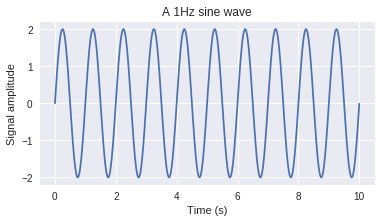

In [69]:
## Generating a sine wave of 1Hz and amplitude of 2:
sign1 = sineWave(1, 2, time)

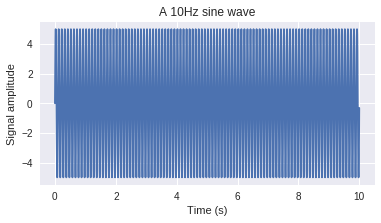

In [70]:
## Generating a sinus wave of 10Hz and amplitude of 5:
sign2 = sineWave(10, 5, time)

## Applying the STFT:

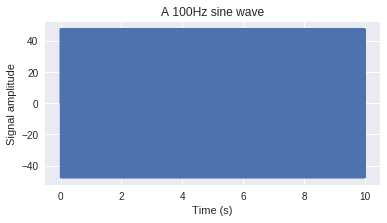

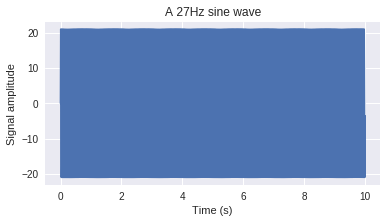

In [71]:
## Creating a test sine wave:
sinal = sineWave(100, 50, time) + sineWave(27, 21, time)

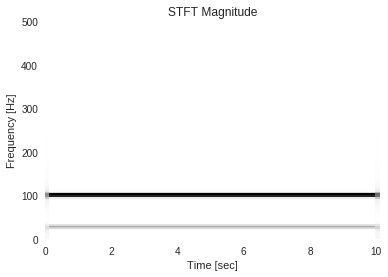

In [63]:
## Calculating the STFT spectrogram
## Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
f, t, Zxx = signal.stft(sinal, fs)
plt.pcolormesh(t, f, np.abs(Zxx))
plt.title('STFT Magnitude')
#plt.ylim(0,160)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()